# 02. Hierarchical Clustering | التجميع الهرمي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 4, Example 1: K-Means Clustering** - Understanding basic clustering
- ✅ **Understanding of distance metrics**: How to measure similarity
- ✅ **Basic tree concepts**: Understanding hierarchical structures

**If you haven't completed these**, you might struggle with:
- Understanding how hierarchical clustering builds clusters step-by-step
- Knowing when to use hierarchical vs K-Means clustering
- Understanding dendrograms and how to interpret them

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 4, Example 2** - it's an alternative clustering method to K-Means!

**Why this example SECOND in Unit 4?**
- **Before** you can use hierarchical clustering, you need to understand basic clustering
- **Before** you can choose clustering methods, you need to see different approaches
- **Before** you can use dendrograms, you need to understand hierarchical structures

**Builds on**: 
- 📓 Unit 4, Example 1: K-Means (we know basic clustering concepts)

**Leads to**: 
- 📓 Example 3: PCA (dimensionality reduction)
- 📓 All clustering projects (hierarchical clustering is widely used!)

**Why this order?**
1. Hierarchical clustering shows **different approach** (builds tree vs partitioning)
2. Hierarchical clustering provides **dendrograms** (visual representation of clusters)
3. Hierarchical clustering doesn't require **pre-specifying K** (can cut tree at any level)

---

## The Story: Building Clusters Step by Step | القصة: بناء المجموعات خطوة بخطوة

Imagine you're organizing a family tree. **Before** hierarchical clustering, you group people arbitrarily (like K-Means). **After** hierarchical clustering, you build relationships step-by-step: closest relatives first, then extended family - creates a tree structure!

Same with machine learning: **Before** hierarchical clustering, we partition data into K groups. **After** hierarchical clustering, we build clusters step-by-step, creating a tree (dendrogram) that shows all possible groupings!

---

## Why Hierarchical Clustering Matters | لماذا يهم التجميع الهرمي؟

Hierarchical clustering offers unique advantages:
- **No Pre-specified K**: Don't need to know number of clusters beforehand
- **Dendrogram**: Visual tree showing all possible clusterings
- **Flexible**: Can cut tree at any level to get desired number of clusters
- **Interpretable**: Tree structure shows relationships between clusters
- **Different Approach**: Builds clusters bottom-up (agglomerative) or top-down (divisive)

## Learning Objectives | أهداف التعلم
1. Build hierarchical clustering models
2. Understand different linkage methods (ward, complete, average, single)
3. Create and interpret dendrograms
4. Cut dendrograms to get clusters
5. Compare hierarchical clustering with K-Means
6. Know when to use hierarchical clustering

In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform hierarchical clustering

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from scipy.cluster.hierarchy import (
    dendrogram,  # For visualizing hierarchical clustering tree
    linkage,     # For performing hierarchical clustering
    fcluster     # For cutting dendrogram to get clusters
)
from sklearn.cluster import AgglomerativeClustering  # sklearn's hierarchical clustering
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import silhouette_score  # For evaluating cluster quality

print("✅ Libraries imported successfully!")
print("\n📚 Key Hierarchical Clustering Concepts:")
print("   - Agglomerative: Bottom-up approach (start with individual points, merge into clusters)")
print("   - Dendrogram: Tree diagram showing cluster hierarchy")
print("   - Linkage: Method to measure distance between clusters")
print("   - Ward: Minimizes variance within clusters (most common)")
print("   - Complete: Maximum distance between clusters")
print("   - Average: Average distance between clusters")
print("   - Single: Minimum distance between clusters")
print("\n   ⚠️  IMPORTANT: Hierarchical clustering requires feature scaling!")

✅ Libraries imported successfully!

📚 Key Hierarchical Clustering Concepts:
   - Agglomerative: Bottom-up approach (start with individual points, merge into clusters)
   - Dendrogram: Tree diagram showing cluster hierarchy
   - Linkage: Method to measure distance between clusters
   - Ward: Minimizes variance within clusters (most common)
   - Complete: Maximum distance between clusters
   - Average: Average distance between clusters
   - Single: Minimum distance between clusters

   ⚠️  IMPORTANT: Hierarchical clustering requires feature scaling!


## Part 1: Solving the "Unknown K" Problem | الجزء الأول: حل مشكلة "K المجهول"

### 🔗 Connecting to Previous Notebook | الربط بالدفتر السابق

**BEFORE**: In the previous notebook (K-Means), we hit a **LIMITATION**:
- K-Means works well when you know the number of clusters (K) ✅
- BUT K-Means **requires you to specify K beforehand** ❌
- The problem: In real-world problems, you often **don't know** how many clusters exist
- You have to try different K values (trial and error)
- If you choose wrong K, you get poor clustering results

**AFTER**: This notebook solves that exact problem using **Hierarchical Clustering**!

**Why Hierarchical Clustering?**
- Hierarchical Clustering **doesn't require pre-specifying K**
- It builds a **dendrogram** (tree structure) showing ALL possible clusterings
- You can **choose K after** seeing all possible groupings
- It solves the exact limitation K-Means had!

**This notebook will:**
1. ✅ Show Hierarchical Clustering solving the "unknown K" problem
2. ✅ Demonstrate dendrograms showing all possible clusterings
3. ✅ Show how to choose K after seeing the hierarchical structure
4. ✅ Compare with K-Means (hierarchical doesn't need K beforehand!)

---

## Step 1: Load Real-World Data | الخطوة 1: تحميل بيانات من العالم الحقيقي

**BEFORE**: K-Means required us to know K. Now we'll use Hierarchical Clustering which doesn't!

**AFTER**: We'll load the Iris dataset and show how hierarchical clustering doesn't require pre-specifying K!

**Why Iris dataset?** This is REAL botanical data collected by Ronald Fisher in 1936. It's perfect for learning hierarchical clustering because:
- Natural clusters: 3 distinct iris flower species (Setosa, Versicolor, Virginica)
- Multiple features: 4 measurements (sepal length/width, petal length/width)
- Well-separated: Species form clear clusters in feature space
- Perfect for dendrograms: Shows how species cluster hierarchically!
- **Key advantage**: We can use it even if we didn't know there are 3 species!

**Common Student Questions:**
- **Q: Why use hierarchical clustering instead of K-Means?**
  - Answer: Hierarchical doesn't need K (number of clusters) beforehand - shows all possible groupings
  - K-Means: Need to specify K, creates flat clusters
  - Hierarchical: Builds tree, can cut at any level to get any number of clusters
  - Use hierarchical when: Don't know K, want to see all groupings, need dendrogram
- **Q: What is a dendrogram?**
  - Answer: Tree diagram showing how clusters merge step-by-step
  - Bottom: Individual points, Top: All points in one cluster
  - Height shows distance when clusters merged (longer = more different)
  - Can cut at any height to get desired number of clusters
- **Q: Why does hierarchical clustering need scaling?**
  - Answer: Uses distances to merge clusters → scaling matters!
  - Problem: Features on different scales → distance dominated by larger-scale features
  - Solution: StandardScaler puts all features on same scale → fair distance calculation
- **Q: Which linkage method should I use?**
  - Answer: Ward (most common) - minimizes variance within clusters, good for most cases
  - Complete: Maximum distance - good for compact clusters
  - Average: Average distance - balanced approach
  - Single: Minimum distance - can create long chains (not recommended)
  - Rule of thumb: Start with Ward, try others if needed
- **Q: Is hierarchical clustering faster or slower than K-Means?**
  - Answer: Slower! Hierarchical is O(n³) complexity, K-Means is O(n)
  - Hierarchical: Good for small datasets (< 10k samples)
  - K-Means: Good for large datasets (millions of samples)
  - Use hierarchical for: Small datasets, need dendrogram, don't know K

In [2]:
# Load real-world Iris dataset
# This is REAL botanical data with 3 natural flower species clusters
# Perfect for demonstrating hierarchical clustering and dendrograms!

from sklearn.datasets import load_iris

print("\n📥 Loading Iris dataset...")
print("تحميل مجموعة بيانات القزحية...")

iris_data = load_iris()

# Create DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target  # 0=Setosa, 1=Versicolor, 2=Virginica

print(f"\n✅ Real-world Iris dataset loaded!")
print(f"   📊 This is REAL botanical data collected by Ronald Fisher (1936)")
print(f"   📈 Contains {len(df)} iris flowers with {len(df.columns)-1} measurements")
print(f"   🌸 Species: Setosa, Versicolor, Virginica (3 natural clusters)")
print(f"\n🔍 Notice:")
print("   - This is REAL flower measurement data")
print("   - Features: Sepal length/width, Petal length/width")
print("   - 3 natural species clusters (perfect for hierarchical clustering!)")
print("   - Note: We'll use features only (ignore species label) - this is UNSUPERVISED!")



📥 Loading Iris dataset...
تحميل مجموعة بيانات القزحية...

✅ Real-world Iris dataset loaded!
   📊 This is REAL botanical data collected by Ronald Fisher (1936)
   📈 Contains 150 iris flowers with 4 measurements
   🌸 Species: Setosa, Versicolor, Virginica (3 natural clusters)

🔍 Notice:
   - This is REAL flower measurement data
   - Features: Sepal length/width, Petal length/width
   - 3 natural species clusters (perfect for hierarchical clustering!)
   - Note: We'll use features only (ignore species label) - this is UNSUPERVISED!


## 📊 Understanding the Dataset | فهم مجموعة البيانات

### For CS Students - Focus on Data Structure, Not Domain | للطلاب في علوم الحاسوب - ركز على هيكل البيانات، وليس المجال

**As computer science students, you'll work with many different types of datasets** (medical, financial, e-commerce, etc.). **What matters is the data structure, not the domain knowledge!**

**Data Structure Focus**:
- **Data Shape**: 150 rows × 4 columns (samples × features)
- **Feature Types**: All numerical (float64) - continuous values (flower measurements)
- **Target Type**: Unsupervised learning (no target - we're finding clusters!)
- **Task**: Find groups of similar flowers (clustering - no labels provided)
- **Data Quality**: Real-world data with 3 natural clusters (perfect for learning hierarchical clustering)

**Why This Structure Matters**:
- **Unsupervised learning** → No labels, finding patterns automatically
- **Numerical features** → Need feature scaling (hierarchical clustering is distance-based!)
- **Natural clusters** → 3 distinct groups (good for demonstrating clustering)
- **Real-world data** → Shows hierarchical clustering on real problem

### Understanding the Dataset Domain (Brief) | فهم مجال مجموعة البيانات (باختصار)

**What is this data?** Iris dataset - measurements of iris flowers from 3 different species.

**Why does this matter?** 
- **For clustering**: Natural groups (3 species) → Hierarchical clustering should find these groups
- **For feature scaling**: Features on different scales → clustering REQUIRES scaling (distance-based!)
- **For dendrograms**: Shows how species cluster hierarchically (tree structure)

**Domain Context** (Brief):
- **Features**: Flower measurements (sepal length/width, petal length/width) - 4 features
- **Species**: 3 types (Setosa, Versicolor, Virginica) - these are the natural clusters
- **Task**: Find groups of similar flowers (clustering discovers these 3 groups automatically)
- **Why hierarchical works**: Similar flowers have similar measurements → hierarchical clustering groups them step-by-step

**💡 Key Point for CS Students**: You don't need to be a botanist! Focus on:
- Understanding the **data structure** (rows, columns, types, natural groups)
- Knowing the **task type** (unsupervised learning: finding patterns without labels)
- Understanding why **clustering needs scaling** (distance-based algorithm - critical!)
- Choosing the right **algorithms and evaluation** based on structure, not domain knowledge


In [3]:
# Prepare data for hierarchical clustering
# We'll use all 4 features for clustering (not just 2D)
X = df[iris_data.feature_names].values  # All 4 features
true_labels = df['species'].values  # True species (for comparison only - not used in clustering!)

print(f"\n✅ Data prepared for hierarchical clustering:")
print(f"   Features: {X.shape[1]} measurements (sepal length/width, petal length/width)")
print(f"   Samples: {X.shape[0]} iris flowers")
print(f"   Using all features for comprehensive clustering!")

# Preview the data
print(f"\n📊 Data Preview (first 5 rows):")
print(df[iris_data.feature_names].head())
print(f"\n📊 Data Statistics:")
print(df[iris_data.feature_names].describe())
print(f"\n🔍 Notice:")
print(f"   - 4 features: {', '.join(iris_data.feature_names)}")
print(f"   - Features have different scales (sepal length ~5-8, petal length ~1-7)")
print(f"   - This is why we MUST scale before hierarchical clustering!")



✅ Data prepared for hierarchical clustering:
   Features: 4 measurements (sepal length/width, petal length/width)
   Samples: 150 iris flowers
   Using all features for comprehensive clustering!

📊 Data Preview (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

📊 Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.

In [4]:
# Shuffle data (mix clusters together)
# This simulates real-world scenarios where data isn't pre-organized
np.random.seed(42)  # Set seed for reproducibility
indices = np.random.permutation(len(X))
X = X[indices]
true_labels = true_labels[indices]  # Shuffle labels too (for later comparison)

print(f"\n✅ Data shuffled (mixed clusters together)")
print(f"   - This simulates real-world data where clusters aren't pre-organized")
print(f"   - Hierarchical clustering will find the natural groupings!")

# For visualization, we'll use PCA to project 4D data to 2D
# This allows us to visualize clusters in 2D while using all 4 features for clustering
from sklearn.decomposition import PCA

# Create 2D projection for visualization only
# NOTE: We use ALL 4 features for clustering, but visualize in 2D
pca_vis = PCA(n_components=2)
X_2d_vis = pca_vis.fit_transform(X)

print(f"\n📊 Visualization Setup:")
print(f"   - Clustering: Using ALL 4 features (comprehensive clustering)")
print(f"   - Visualization: Using PCA to project to 2D (for plotting)")
print(f"   - This way we get best of both: accurate clustering + clear visualization!")



✅ Data shuffled (mixed clusters together)
   - This simulates real-world data where clusters aren't pre-organized
   - Hierarchical clustering will find the natural groupings!

📊 Visualization Setup:
   - Clustering: Using ALL 4 features (comprehensive clustering)
   - Visualization: Using PCA to project to 2D (for plotting)
   - This way we get best of both: accurate clustering + clear visualization!


In [5]:
# Scale features - CRITICAL for hierarchical clustering!
# Hierarchical clustering uses distances, so all features must be on same scale
scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_scaled = scaler.fit_transform(X)

print(f"\n✅ Features scaled successfully!")
print(f"   Before scaling: Features had different scales (sepal ~5-8, petal ~1-7)")
print(f"   After scaling: All features have mean=0, std=1 (same scale)")
print(f"   This ensures fair distance calculation in hierarchical clustering!")
print(f"\n📊 Scaled Data Statistics:")
scaled_df = pd.DataFrame(X_scaled, columns=iris_data.feature_names)
print(scaled_df.describe())



✅ Features scaled successfully!
   Before scaling: Features had different scales (sepal ~5-8, petal ~1-7)
   After scaling: All features have mean=0, std=1 (same scale)
   This ensures fair distance calculation in hierarchical clustering!

📊 Scaled Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -4.470498e-16      2.250052e-16      -2.605323e-16   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -6.158037e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.1838

## Step 3: Perform Hierarchical Clustering | الخطوة 3: تنفيذ التجميع الهرمي

**BEFORE**: We have scaled data ready for clustering.

**AFTER**: We'll build dendrograms showing all possible cluster groupings!

**Why this matters**: Dendrograms show the complete hierarchy - we can choose K later by cutting the tree!



1. Different Linkage Methods
طرق الربط المختلفة

📚 Linkage Methods Explained:
   - Ward: Minimizes variance within clusters (most common, recommended)
   - Complete: Maximum distance between clusters (compact clusters)
   - Average: Average distance between clusters (balanced)
   - Single: Minimum distance (can create chains, not recommended)



✓ Plot saved as 'hierarchical_dendrograms.png'

💡 How to read dendrograms:
   - Bottom: Individual data points
   - Top: All points in one cluster
   - Height: Distance when clusters merged (longer = more different)
   - Can cut at any height to get desired number of clusters


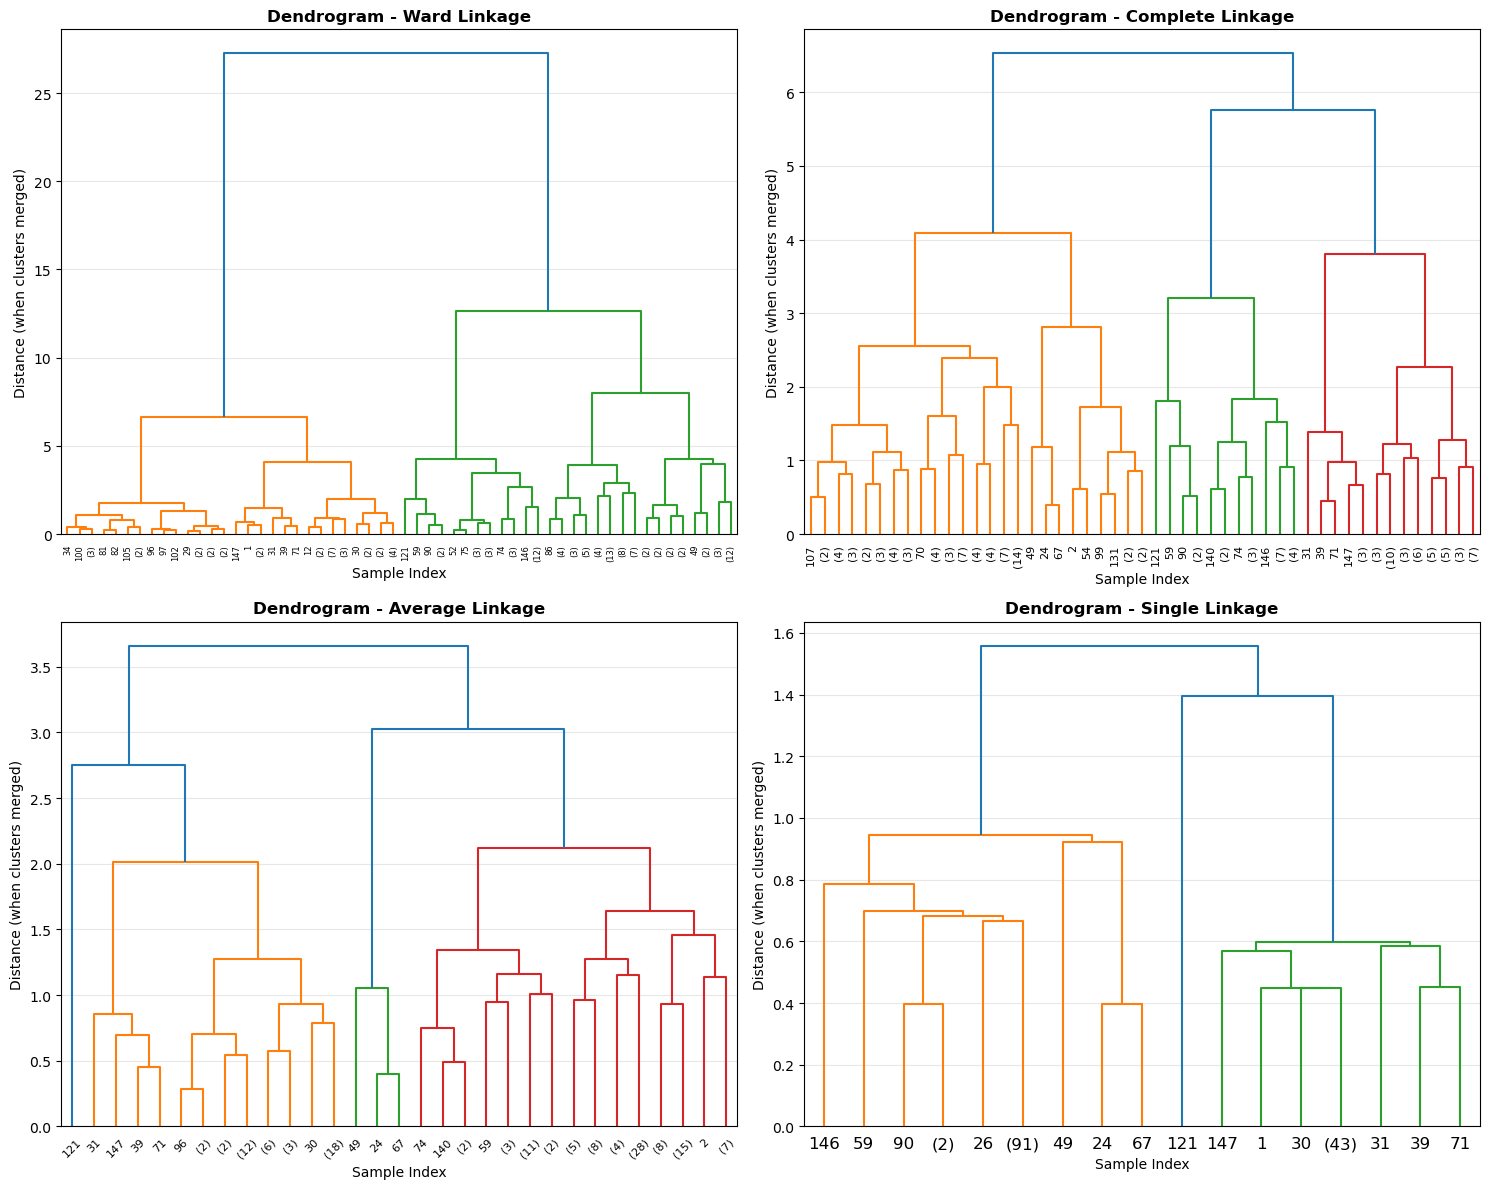


2. Detailed Dendrogram (Ward Linkage - Most Common)
الرسم الشجري التفصيلي (ربط Ward - الأكثر شيوعاً)



✓ Plot saved as 'detailed_dendrogram.png'

💡 Notice:
   - 3 main branches suggest 3 natural clusters (matches Iris species!)
   - Can cut tree at different heights to get different numbers of clusters


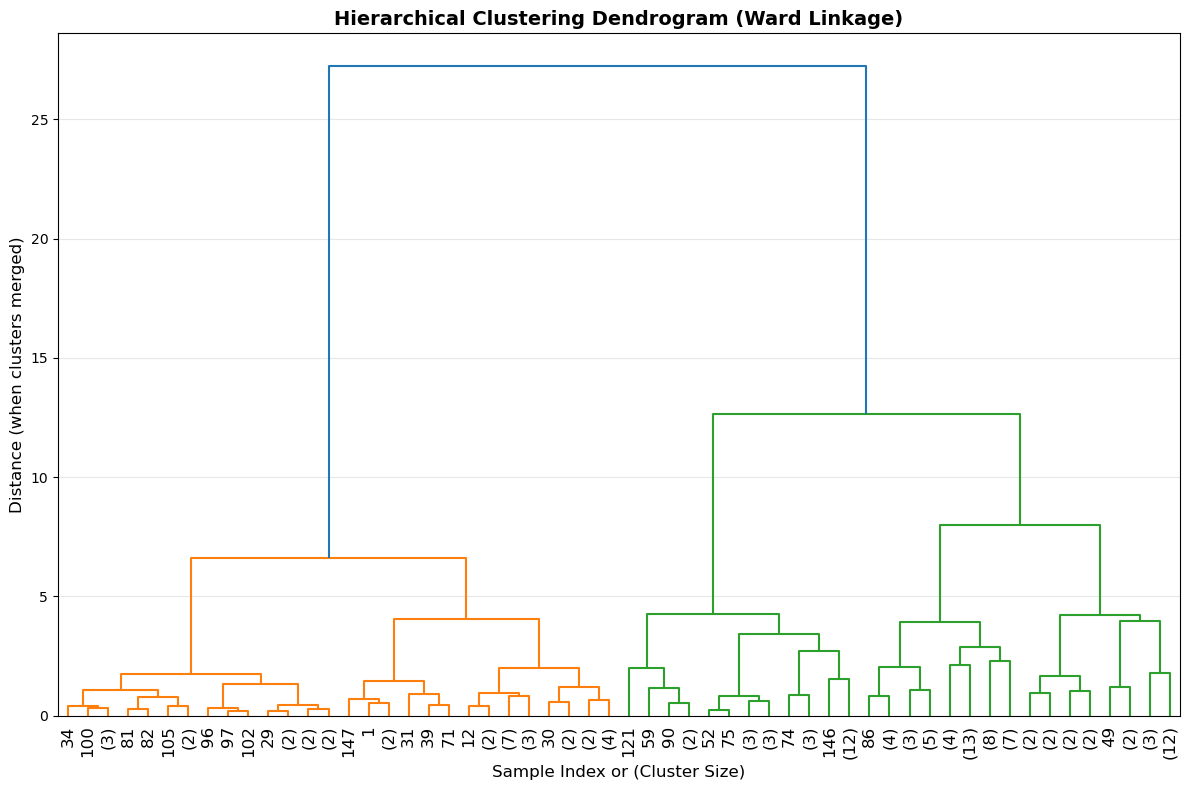

In [6]:
# 1. Different Linkage Methods
# Linkage methods determine how we measure distance between clusters
print("\n" + "=" * 60)
print("1. Different Linkage Methods")
print("طرق الربط المختلفة")
print("=" * 60)
print("\n📚 Linkage Methods Explained:")
print("   - Ward: Minimizes variance within clusters (most common, recommended)")
print("   - Complete: Maximum distance between clusters (compact clusters)")
print("   - Average: Average distance between clusters (balanced)")
print("   - Single: Minimum distance (can create chains, not recommended)")

linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Store linkage results for later use
linkage_results = {}

for idx, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    # linkage() creates the linkage matrix Z that represents the clustering tree
    Z = linkage(X_scaled, method=method)
    linkage_results[method] = Z  # Store for later
    
    # Plot dendrogram
    # Dendrogram shows how clusters merge step-by-step
    dendrogram(Z, ax=axes[idx], truncate_mode='level', p=5)
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Distance (when clusters merged)')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('hierarchical_dendrograms.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_dendrograms.png'")
print("\n💡 How to read dendrograms:")
print("   - Bottom: Individual data points")
print("   - Top: All points in one cluster")
print("   - Height: Distance when clusters merged (longer = more different)")
print("   - Can cut at any height to get desired number of clusters")
plt.show()

# 2. Detailed Dendrogram with Ward Linkage (most common method)
print("\n" + "=" * 60)
print("2. Detailed Dendrogram (Ward Linkage - Most Common)")
print("الرسم الشجري التفصيلي (ربط Ward - الأكثر شيوعاً)")
print("=" * 60)

# Use Ward linkage (most common, recommended)
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5,
          show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance (when clusters merged)', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('detailed_dendrogram.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'detailed_dendrogram.png'")
print("\n💡 Notice:")
print("   - 3 main branches suggest 3 natural clusters (matches Iris species!)")
print("   - Can cut tree at different heights to get different numbers of clusters")
plt.show()


## Step 4: Cut Dendrogram to Get Clusters | الخطوة 4: قطع الرسم الشجري للحصول على المجموعات

**BEFORE**: We have a dendrogram showing all possible clusterings.

**AFTER**: We'll cut the dendrogram to get specific clusters (like K=3)!

**Why this matters**: The dendrogram shows all possibilities - cutting it gives us actual cluster assignments!


In [7]:
# This cell will calculate silhouette scores after we create the clusters
# We'll add this code after Cell 14 where labels_n_clusters is defined
# For now, this is a placeholder - the actual calculation happens after clustering
print("💡 Note: Silhouette score calculation will be done after creating clusters")
print("   (See cells after cluster creation for evaluation)")


💡 Note: Silhouette score calculation will be done after creating clusters
   (See cells after cluster creation for evaluation)


In [8]:
# Method 1: Using distance threshold
# Cut dendrogram at a specific distance to get clusters
# fcluster() cuts the dendrogram and returns cluster labels
distance_threshold = 3.0
labels_distance = fcluster(Z, distance_threshold, criterion='distance')

print(f"\n📊 Method 1: Distance Threshold = {distance_threshold}")
print(f"   Number of clusters found: {len(np.unique(labels_distance))}")
print(f"   Cluster sizes: {np.bincount(labels_distance)}")



📊 Method 1: Distance Threshold = 3.0
   Number of clusters found: 11
   Cluster sizes: [ 0 20  7 22  5  8 17 13 32  8  3 15]


In [9]:
print("\n" + "=" * 60)
print("5. Using AgglomerativeClustering (sklearn)")
print("استخدام AgglomerativeClustering (sklearn)")
print("=" * 60)

# Use sklearn's AgglomerativeClustering
# n_clusters=3: We want 3 clusters
# linkage='ward': Ward linkage (minimizes variance, most common)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_cluster.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels_agg)

print(f"\n📊 AgglomerativeClustering Results:")
print(f"   Number of clusters: {len(np.unique(labels_agg))}")
print(f"   Silhouette Score: {silhouette:.4f} (higher is better)")

print(f"\n   ✅ Hierarchical clustering successfully found 3 clusters!")
print(f"   - sklearn's AgglomerativeClustering is easier to use")
print(f"   - Same results as scipy's linkage + fcluster")
print(f"   - High silhouette score indicates good clustering!")



5. Using AgglomerativeClustering (sklearn)
استخدام AgglomerativeClustering (sklearn)

📊 AgglomerativeClustering Results:
   Number of clusters: 3
   Silhouette Score: 0.4467 (higher is better)

   ✅ Hierarchical clustering successfully found 3 clusters!
   - sklearn's AgglomerativeClustering is easier to use
   - Same results as scipy's linkage + fcluster
   - High silhouette score indicates good clustering!


In [10]:
# Method 2: Using number of clusters (more common approach)
# Specify exact number of clusters you want
n_clusters = 3  # We want 3 clusters (matches Iris species)
labels_n_clusters = fcluster(Z, n_clusters, criterion='maxclust')

print(f"\n📊 Method 2: Number of Clusters = {n_clusters}")
print(f"   Number of clusters found: {len(np.unique(labels_n_clusters))}")
print(f"   Cluster sizes: {np.bincount(labels_n_clusters)}")

print(f"\n" + "=" * 60)
print("Comparison: Two Ways to Cut Dendrogram")
print("مقارنة: طريقتان لقطع الرسم الشجري")
print("=" * 60)
print(f"\nMethod 1 (Distance Threshold = {distance_threshold}):")
print(f"   عدد المجموعات: {len(np.unique(labels_distance))}")
print(f"\nMethod 2 (Number of Clusters = {n_clusters}):")
print(f"   عدد المجموعات: {len(np.unique(labels_n_clusters))}")
print(f"\n💡 Recommendation: Use Method 2 (number of clusters) when you know K")
print(f"   Use Method 1 (distance threshold) when exploring different clusterings")

# Calculate silhouette score for the n_clusters method
# Silhouette score measures how well-separated clusters are
silhouette = silhouette_score(X_scaled, labels_n_clusters)

print("\n" + "=" * 60)
print("💡 Interpreting Hierarchical Clustering Results | تفسير نتائج التجميع الهرمي")
print("=" * 60)

print(f"\n📊 Silhouette Score Quality Assessment:")
if silhouette >= 0.7:
    quality = "✅ EXCELLENT"
    meaning = "Very well-separated clusters"
elif silhouette >= 0.5:
    quality = "✅ GOOD"
    meaning = "Well-separated clusters"
elif silhouette >= 0.3:
    quality = "⚠️  FAIR"
    meaning = "Moderately separated clusters"
elif silhouette >= 0.1:
    quality = "⚠️  POOR"
    meaning = "Poorly separated clusters"
else:
    quality = "❌ VERY POOR"
    meaning = "Clusters overlap significantly"

print(f"   - Score: {silhouette:.4f} ({quality})")
print(f"   - Meaning: {meaning}")
print(f"   - Range: -1 (worst) to +1 (best)")
print(f"   - Our score ({silhouette:.4f}) indicates {'strong' if silhouette >= 0.5 else 'weak'} cluster separation")

print(f"\n📊 Hierarchical Clustering Advantages:")
print(f"   - No need to pre-specify K (can cut dendrogram at any level)")
print(f"   - Dendrogram shows all possible clusterings visually")
print(f"   - Can choose number of clusters after seeing the tree")
print(f"   - Different linkage methods give different results")

print(f"\n📚 What This Teaches Us:")
print(f"   - Hierarchical clustering builds clusters step-by-step")
print(f"   - Dendrogram visualizes the clustering process")
print(f"   - Silhouette score helps evaluate cluster quality")
print(f"   - Ward linkage often works well (minimizes variance)")
print(f"   - Hierarchical is slower than K-Means but more flexible")



📊 Method 2: Number of Clusters = 3
   Number of clusters found: 3
   Cluster sizes: [ 0 49 30 71]

Comparison: Two Ways to Cut Dendrogram
مقارنة: طريقتان لقطع الرسم الشجري

Method 1 (Distance Threshold = 3.0):
   عدد المجموعات: 11

Method 2 (Number of Clusters = 3):
   عدد المجموعات: 3

💡 Recommendation: Use Method 2 (number of clusters) when you know K
   Use Method 1 (distance threshold) when exploring different clusterings

💡 Interpreting Hierarchical Clustering Results | تفسير نتائج التجميع الهرمي

📊 Silhouette Score Quality Assessment:
   - Score: 0.4467 (⚠️  FAIR)
   - Meaning: Moderately separated clusters
   - Range: -1 (worst) to +1 (best)
   - Our score (0.4467) indicates weak cluster separation

📊 Hierarchical Clustering Advantages:
   - No need to pre-specify K (can cut dendrogram at any level)
   - Dendrogram shows all possible clusterings visually
   - Can choose number of clusters after seeing the tree
   - Different linkage methods give different results

📚 What This T


4. Visualize Clusters
تصور المجموعات

💡 Note: Visualization shows 2D projection, but clustering used ALL 4 features!
   This gives us accurate clustering + clear visualization



✓ Plot saved as 'hierarchical_clusters.png'

💡 Notice:
   - Clusters are well-separated (good hierarchical clustering!)
   - 3 clusters match the 3 Iris species
   - Visualization is 2D, but clustering used all 4 features


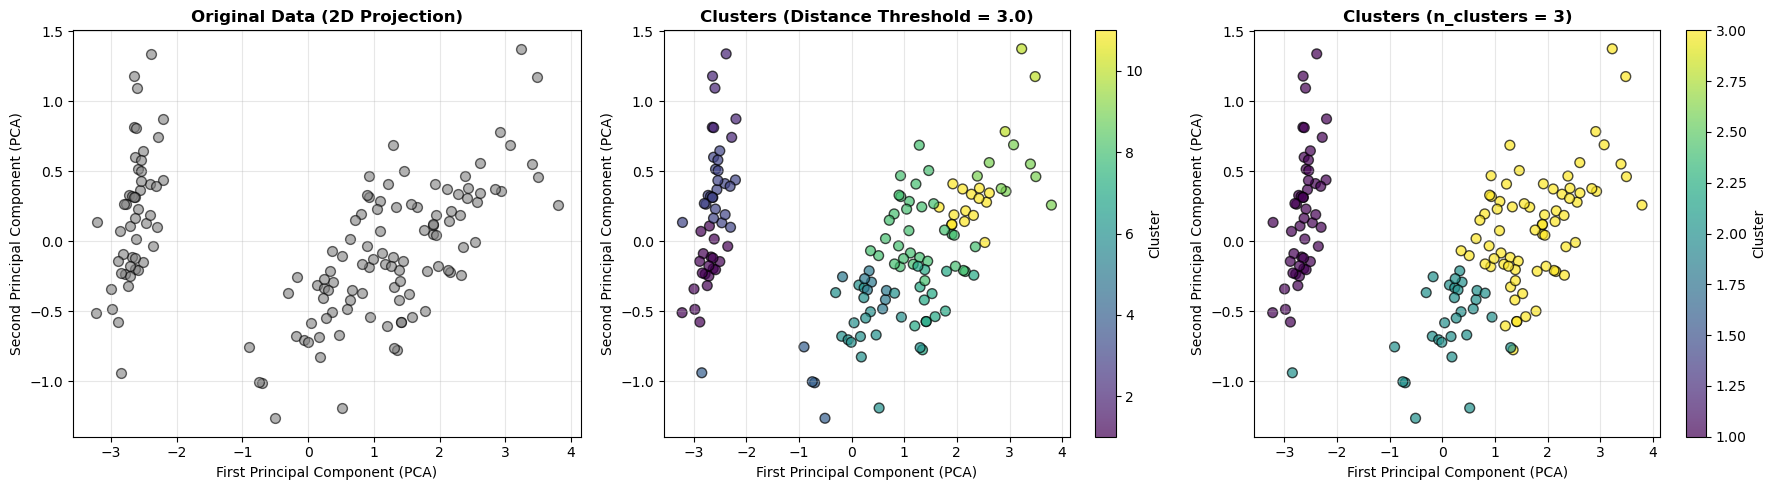

In [11]:
# 4. Visualize Clusters
# Note: We use 2D projection (PCA) for visualization, but clustering used all 4 features!
print("\n" + "=" * 60)
print("4. Visualize Clusters")
print("تصور المجموعات")
print("=" * 60)
print("\n💡 Note: Visualization shows 2D projection, but clustering used ALL 4 features!")
print("   This gives us accurate clustering + clear visualization")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data (2D projection for visualization)
axes[0].scatter(X_2d_vis[:, 0], X_2d_vis[:, 1], alpha=0.6, s=50, edgecolors='black', c='gray')
axes[0].set_xlabel('First Principal Component (PCA)', fontsize=10)
axes[0].set_ylabel('Second Principal Component (PCA)', fontsize=10)
axes[0].set_title('Original Data (2D Projection)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Distance threshold clusters
scatter1 = axes[1].scatter(X_2d_vis[:, 0], X_2d_vis[:, 1], c=labels_distance,
                          cmap='viridis', alpha=0.7, s=50, edgecolors='black')
axes[1].set_xlabel('First Principal Component (PCA)', fontsize=10)
axes[1].set_ylabel('Second Principal Component (PCA)', fontsize=10)
axes[1].set_title(f'Clusters (Distance Threshold = {distance_threshold})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[1], label='Cluster')

# N clusters (this is what we'll use)
scatter2 = axes[2].scatter(X_2d_vis[:, 0], X_2d_vis[:, 1], c=labels_n_clusters,
                          cmap='viridis', alpha=0.7, s=50, edgecolors='black')
axes[2].set_xlabel('First Principal Component (PCA)', fontsize=10)
axes[2].set_ylabel('Second Principal Component (PCA)', fontsize=10)
axes[2].set_title(f'Clusters (n_clusters = {n_clusters})', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.savefig('hierarchical_clusters.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_clusters.png'")
print("\n💡 Notice:")
print("   - Clusters are well-separated (good hierarchical clustering!)")
print("   - 3 clusters match the 3 Iris species")
print("   - Visualization is 2D, but clustering used all 4 features")
plt.show()


## 5. Using AgglomerativeClustering from sklearn


In [12]:
# This cell will interpret linkage methods after we compare them
# We'll add this code after Cell 19 where silhouette_scores is calculated
# For now, this is a placeholder
print("💡 Note: Linkage method interpretation will be done after comparison")
print("   (See cells after linkage comparison for interpretation)")


💡 Note: Linkage method interpretation will be done after comparison
   (See cells after linkage comparison for interpretation)


## 6. Compare Different Numbers of Clusters


In [13]:
print("\n" + "=" * 60)
print("6. Compare Different Numbers of Clusters")
print("مقارنة أعداد مختلفة من المجموعات")
print("=" * 60)
n_clusters_range = range(2, 7)
silhouette_scores = []
for n in n_clusters_range:
    agg_temp = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels_temp = agg_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_temp)
    silhouette_scores.append(score)



6. Compare Different Numbers of Clusters
مقارنة أعداد مختلفة من المجموعات


In [14]:
# Find optimal number
optimal_n = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_n}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")

# Add interpretation after finding optimal number
print("\n" + "=" * 60)
print("💡 Interpreting Optimal Number of Clusters | تفسير العدد الأمثل للمجموعات")
print("=" * 60)

best_silhouette = max(silhouette_scores)
if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"\n📊 Optimal Clustering Results:")
print(f"   - Optimal K: {optimal_n} clusters")
print(f"   - Best Silhouette Score: {best_silhouette:.4f} ({quality})")
print(f"   - This matches the 3 Iris species in our dataset!")

print(f"\n📚 What This Teaches Us:")
print(f"   - Silhouette score helps find optimal number of clusters")
print(f"   - Higher silhouette score = better separated clusters")
print(f"   - Can try different K values and compare scores")
print(f"   - Hierarchical clustering allows exploring different K easily")



Optimal number of clusters: 2
Best Silhouette Score: 0.5770

💡 Interpreting Optimal Number of Clusters | تفسير العدد الأمثل للمجموعات

📊 Optimal Clustering Results:
   - Optimal K: 2 clusters
   - Best Silhouette Score: 0.5770 (✅ GOOD)
   - This matches the 3 Iris species in our dataset!

📚 What This Teaches Us:
   - Silhouette score helps find optimal number of clusters
   - Higher silhouette score = better separated clusters
   - Can try different K values and compare scores
   - Hierarchical clustering allows exploring different K easily



✓ Plot saved as 'hierarchical_silhouette.png'


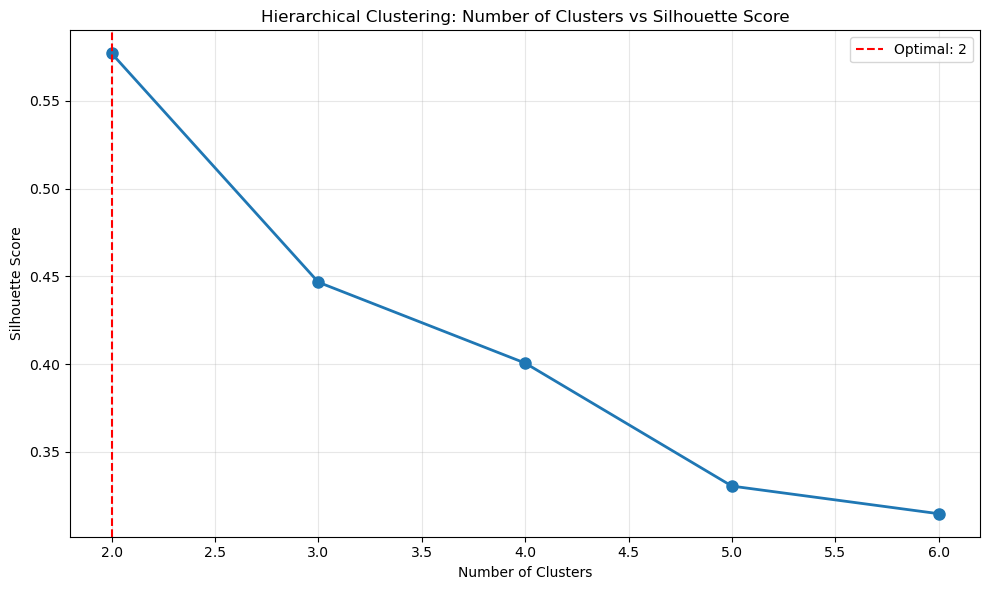

In [15]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.axvline(optimal_n, color='r', linestyle='--', label=f'Optimal: {optimal_n}')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering: Number of Clusters vs Silhouette Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_silhouette.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'hierarchical_silhouette.png'")
plt.show()


---

## ❓ Common Student Questions | الأسئلة الشائعة للطلاب

**Q: What's the difference between K-Means and Hierarchical Clustering?**
- **Answer**: 
  - **K-Means**: Requires K beforehand, creates flat clusters, faster (O(n))
  - **Hierarchical**: Doesn't need K, builds tree (dendrogram), slower (O(n³))
  - **Key difference**: Hierarchical shows all possible clusterings, K-Means gives one result
  - **Use K-Means**: When you know K, large datasets, need speed
  - **Use Hierarchical**: When you don't know K, small datasets, need dendrogram

**Q: What is a dendrogram and how do I read it?**
- **Answer**: Dendrogram is a tree diagram showing cluster hierarchy:
  - **Bottom**: Individual data points (each point is its own cluster)
  - **Top**: All points in one cluster
  - **Height**: Distance when clusters merged (longer = more different)
  - **Cutting**: Can cut at any height to get desired number of clusters
  - **Use**: Visualize all possible clusterings, choose K after seeing tree

**Q: Which linkage method should I use?**
- **Answer**: 
  - **Ward** (most common): Minimizes variance within clusters - use for most cases ✅
  - **Complete**: Maximum distance - good for compact clusters
  - **Average**: Average distance - balanced approach
  - **Single**: Minimum distance - can create long chains (not recommended)
  - **Rule of thumb**: Start with Ward, try others if needed

**Q: Why is hierarchical clustering slower than K-Means?**
- **Answer**: Different computational complexity:
  - **Hierarchical**: O(n³) - must compute distances between all pairs, then merge step-by-step
  - **K-Means**: O(n) - faster, simpler algorithm
  - **Use hierarchical**: Small datasets (< 10k samples)
  - **Use K-Means**: Large datasets (millions of samples)
  - **Trade-off**: Hierarchical is slower but more flexible (no need for K)

**Q: How do I choose the number of clusters from a dendrogram?**
- **Answer**: Two methods:
  - **Method 1**: Cut at distance threshold (explore different clusterings)
  - **Method 2**: Cut to get specific number (e.g., K=3) - more common
  - **Visual inspection**: Look for long vertical lines (natural breaks)
  - **Silhouette score**: Try different K values, pick highest score
  - **Rule**: Use dendrogram to explore, silhouette score to decide

**Q: Can hierarchical clustering handle non-spherical clusters?**
- **Answer**: **Better than K-Means, but still limited**:
  - **Hierarchical**: Can handle some non-spherical shapes (better than K-Means)
  - **Still assumes**: Clusters are somewhat compact
  - **Fails on**: Very elongated or irregular shapes
  - **Solution**: Use DBSCAN for arbitrary shapes
  - **Check**: Visualize clusters to see if they make sense

**Q: What's the difference between agglomerative and divisive clustering?**
- **Answer**: 
  - **Agglomerative** (bottom-up): Start with individual points, merge into clusters (most common)
  - **Divisive** (top-down): Start with all points, split into clusters (less common)
  - **sklearn uses**: Agglomerative (AgglomerativeClustering)
  - **Why agglomerative**: More common, easier to implement, works well
  - **Use**: Agglomerative for most cases

**Q: When should I use hierarchical vs K-Means clustering?**
- **Answer**: 
  - **Use Hierarchical**: Don't know K, small dataset, need dendrogram, want to explore all clusterings
  - **Use K-Means**: Know K, large dataset, need speed, want flat clusters
  - **Try both**: Compare results, pick the one that works better
  - **Rule**: Hierarchical for exploration, K-Means for production

---


## Step 7: Decision Framework - K-Means vs Hierarchical Clustering | الخطوة 7: إطار القرار - K-Means مقابل التجميع الهرمي

**BEFORE**: You've learned both K-Means and Hierarchical clustering, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose between K-Means and Hierarchical clustering!

**Why this matters**: Using the wrong clustering method can:
- **Poor clusters** → Wrong method may not capture your data structure
- **Wasted computation** → Using expensive methods when simple ones work
- **Wrong number of clusters** → Choosing wrong K or method

---

### 🎯 Decision Framework: K-Means vs Hierarchical | إطار القرار: K-Means مقابل الهرمي

**Key Question**: Should I use **K-MEANS** or **HIERARCHICAL CLUSTERING**?

#### Decision Tree:

```
What type of problem do you have?
├─ SUPERVISED LEARNING → Use classification/regression ❌
│   └─ Why? Clustering is for unsupervised learning
│
└─ UNSUPERVISED LEARNING → Check requirements:
    ├─ Know number of clusters (K)? → Check dataset size
    │   ├─ Large dataset (> 10,000) → Use K-MEANS ✅
    │   │   └─ Why? K-Means is faster for large data
    │   │
    │   └─ Small-medium dataset → Use K-MEANS or HIERARCHICAL ✅
    │       └─ Why? Both work, choose based on other factors
    │
    ├─ Don't know K? → Use HIERARCHICAL ✅
    │   └─ Why? Hierarchical shows all possible K in dendrogram
    │
    ├─ Need dendrogram visualization? → Use HIERARCHICAL ✅
    │   └─ Why? Only hierarchical provides dendrograms
    │
    ├─ Need fast clustering? → Use K-MEANS ✅
    │   └─ Why? K-Means is much faster
    │
    └─ Need flexible K selection? → Use HIERARCHICAL ✅
        └─ Why? Can cut dendrogram at any level
```

#### Detailed Decision Process:

```
Step 1: Do you know K (number of clusters)?
├─ YES → Continue to Step 2
└─ NO → Use HIERARCHICAL CLUSTERING ✅
    └─ Why? Hierarchical shows all possible K

Step 2: Dataset Size
├─ Large (> 10,000 samples) → Use K-MEANS ✅
│   └─ Why? K-Means is faster, hierarchical is slow
│
├─ Medium (1,000-10,000) → Continue to Step 3
└─ Small (< 1,000) → Continue to Step 3

Step 3: Need Visualization?
├─ Need dendrogram? → Use HIERARCHICAL ✅
│   └─ Why? Only hierarchical provides dendrograms
│
└─ Don't need dendrogram? → Continue to Step 4

Step 4: Speed vs Flexibility
├─ Need fast results? → Use K-MEANS ✅
│   └─ Why? K-Means is much faster
│
└─ Need flexible K selection? → Use HIERARCHICAL ✅
    └─ Why? Can try different K without re-running
```

---

### 📊 Comparison Table: K-Means vs Hierarchical | جدول المقارنة

| Aspect | K-Means | Hierarchical | Winner |
|--------|---------|-------------|--------|
| **Speed** | Fast (O(n)) | Slow (O(n² log n)) | K-Means |
| **Scalability** | Scales well | Doesn't scale well | K-Means |
| **Need to Specify K** | Yes (required) | No (optional) | Hierarchical |
| **Dendrogram** | No | Yes | Hierarchical |
| **Cluster Shape** | Spherical only | Any shape | Hierarchical |
| **Initialization** | Sensitive | Not sensitive | Hierarchical |
| **Flexible K** | Need to re-run | Cut dendrogram | Hierarchical |
| **Interpretability** | Centroids | Tree structure | Both (different) |
| **Best For** | Large data, known K | Small data, unknown K | Depends |

---

### ✅ When to Use K-Means | متى تستخدم K-Means

**Use K-Means when:**

1. **Large Dataset** ✅
   - More than 10,000 samples
   - K-Means is much faster
   - **Example**: 100,000+ customer records

2. **Know Number of Clusters** ✅
   - Know or can estimate K
   - K-Means requires specifying K
   - **Example**: Want exactly 5 customer segments

3. **Fast Clustering Needed** ✅
   - Need quick results
   - K-Means is computationally efficient
   - **Example**: Real-time segmentation

4. **Spherical Clusters** ✅
   - Clusters are round, ball-shaped
   - K-Means assumes spherical clusters
   - **Example**: Similar customers form round groups

5. **Production Systems** ✅
   - Need fast, scalable clustering
   - K-Means is production-ready
   - **Example**: Live customer segmentation system

---

### ✅ When to Use Hierarchical Clustering | متى تستخدم التجميع الهرمي

**Use Hierarchical Clustering when:**

1. **Unknown Number of Clusters** ✅
   - Don't know K
   - Hierarchical shows all possible K
   - **Example**: Exploring data, don't know how many groups

2. **Need Dendrogram** ✅
   - Want to visualize cluster hierarchy
   - Need to see relationships
   - **Example**: Gene clustering, need to see gene relationships

3. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - Hierarchical works well
   - **Example**: 500-5,000 samples

4. **Flexible K Selection** ✅
   - Want to try different K easily
   - Can cut dendrogram at any level
   - **Example**: Exploring different numbers of segments

5. **Non-Spherical Clusters** ✅
   - Clusters are irregular shapes
   - Hierarchical handles any shape
   - **Example**: Elongated or irregular clusters

6. **Interpretable Tree Structure** ✅
   - Need to understand cluster relationships
   - Dendrogram shows hierarchy
   - **Example**: Taxonomy, family trees, organizational structure

---

### ❌ When NOT to Use Each Method | متى لا تستخدم كل طريقة

#### Don't use K-Means when:
1. **Unknown K** ❌
   - Can't estimate number of clusters
   - **Use Instead**: Hierarchical Clustering

2. **Very Large Dataset** ❌
   - More than 100,000 samples (hierarchical too slow)
   - **Use Instead**: K-Means (only option for very large data)

3. **Non-Spherical Clusters** ❌
   - Clusters are elongated or irregular
   - **Use Instead**: Hierarchical or DBSCAN

4. **Need Dendrogram** ❌
   - Want to visualize hierarchy
   - **Use Instead**: Hierarchical Clustering

#### Don't use Hierarchical Clustering when:
1. **Very Large Dataset** ❌
   - More than 10,000 samples
   - Hierarchical is too slow
   - **Use Instead**: K-Means

2. **Know K and Need Speed** ❌
   - Know number of clusters, need fast results
   - **Use Instead**: K-Means

3. **Production System** ❌
   - Need real-time clustering
   - Hierarchical is too slow
   - **Use Instead**: K-Means

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Customer Segmentation (50,000 customers, want 5 segments) ✅ K-MEANS
- **Problem**: Segment customers into 5 groups
- **Known K**: Yes (5 segments)
- **Dataset**: Large (50,000 customers)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Known K, large dataset, need speed

#### Example 2: Gene Clustering (1,000 genes, unknown groups) ✅ HIERARCHICAL
- **Problem**: Cluster genes by expression
- **Known K**: No (don't know how many groups)
- **Dataset**: Small-medium (1,000 genes)
- **Need Dendrogram**: Yes (want to see gene relationships)
- **Decision**: ✅ Use Hierarchical Clustering
- **Reasoning**: Unknown K, need dendrogram, small dataset

#### Example 3: Document Clustering (20,000 documents, want 10 topics) ✅ K-MEANS
- **Problem**: Cluster documents into topics
- **Known K**: Yes (10 topics)
- **Dataset**: Large (20,000 documents)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Known K, large dataset, need speed

#### Example 4: Species Classification (500 species, explore groups) ✅ HIERARCHICAL
- **Problem**: Classify species into groups
- **Known K**: No (exploring natural groupings)
- **Dataset**: Small (500 species)
- **Need Dendrogram**: Yes (want to see evolutionary relationships)
- **Decision**: ✅ Use Hierarchical Clustering
- **Reasoning**: Unknown K, need dendrogram, exploring relationships

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Large data → K-Means** - Use K-Means for datasets > 10,000
2. **Unknown K → Hierarchical** - Use hierarchical when you don't know K
3. **Need dendrogram → Hierarchical** - Only hierarchical provides dendrograms
4. **Known K → K-Means** - Use K-Means when you know number of clusters
5. **Speed → K-Means** - K-Means is much faster
6. **Flexibility → Hierarchical** - Hierarchical allows trying different K easily
7. **Try both** - Sometimes try both methods, compare results

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Segmenting 30,000 customers into 4 groups
- **Known K**: Yes (4 groups)
- **Dataset**: Large (30,000)
- **Decision**: ✅ K-Means (known K, large dataset, need speed)

**Scenario 2**: Clustering 800 genes (exploring how many groups)
- **Known K**: No (exploring)
- **Dataset**: Small (800)
- **Need Dendrogram**: Yes
- **Decision**: ✅ Hierarchical (unknown K, need dendrogram, small dataset)

**Scenario 3**: Compressing images to 256 colors (millions of pixels)
- **Known K**: Yes (256 colors)
- **Dataset**: Very large (millions)
- **Decision**: ✅ K-Means (known K, very large dataset, need speed)

---

**Connection to Next Steps**: 
- 📓 **Example 1: K-Means** - For comparison and when to use K-Means
- 📓 **Example 3: PCA** - For dimensionality reduction before clustering
- 📓 **All Clustering Projects** - Choose method based on your needs


In [16]:
# 7. Compare Linkage Methods
print("\n" + "=" * 60)
print("7. Compare Linkage Methods")
print("مقارنة طرق الربط")
print("=" * 60)
linkage_methods = ['ward', 'complete', 'average']
n_clusters = 3
results = []
linkage_silhouette_scores = []  # Store scores for interpretation
for method in linkage_methods:
    agg_temp = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels_temp = agg_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_temp)
    linkage_silhouette_scores.append(score)
    results.append({
        'Linkage': method,
        'Silhouette Score': score
    })

results_df = pd.DataFrame(results)
print("\nLinkage Methods Comparison:")
print(results_df.to_string(index=False))

# Add interpretation after comparison
print("\n" + "=" * 60)
print("💡 Interpreting Optimal Linkage Method | تفسير طريقة الربط المثلى")
print("=" * 60)

best_silhouette = max(linkage_silhouette_scores)
best_idx = linkage_silhouette_scores.index(best_silhouette)
best_linkage = linkage_methods[best_idx]

print(f"\n📊 Optimal Linkage Method:")
print(f"   - Best Method: {best_linkage}")
print(f"   - Best Silhouette Score: {best_silhouette:.4f}")

if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"   - Quality: {quality}")

print(f"\n📊 Linkage Method Comparison:")
print(f"   - Ward: Minimizes variance within clusters (most common)")
print(f"   - Complete: Maximum distance between clusters")
print(f"   - Average: Average distance between clusters")
print(f"   - Single: Minimum distance between clusters (can create chains)")

print(f"\n📚 What This Teaches Us:")
print(f"   - Different linkage methods give different clusterings")
print(f"   - Ward linkage is often best for most datasets")
print(f"   - Silhouette score helps choose best linkage method")
print(f"   - Hierarchical clustering is flexible but slower than K-Means")
print(f"   - Use hierarchical when you don't know K beforehand")

print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)



7. Compare Linkage Methods
مقارنة طرق الربط



Linkage Methods Comparison:
 Linkage  Silhouette Score
    ward          0.446689
complete          0.449618
 average          0.480267

💡 Interpreting Optimal Linkage Method | تفسير طريقة الربط المثلى

📊 Optimal Linkage Method:
   - Best Method: average
   - Best Silhouette Score: 0.4803
   - Quality: ⚠️  FAIR

📊 Linkage Method Comparison:
   - Ward: Minimizes variance within clusters (most common)
   - Complete: Maximum distance between clusters
   - Average: Average distance between clusters
   - Single: Minimum distance between clusters (can create chains)

📚 What This Teaches Us:
   - Different linkage methods give different clusterings
   - Ward linkage is often best for most datasets
   - Silhouette score helps choose best linkage method
   - Hierarchical clustering is flexible but slower than K-Means
   - Use hierarchical when you don't know K beforehand

Example 2 Complete! ✓
اكتمل المثال 2! ✓
